In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import os
import pandas as pd

journal = input('scientometrics / jasist')
entity = input('co-author / co-occurrence')

path = os.getcwd()
netfiles_path = path+"\\data_transformation_output\\{}\\netfiles\\{}\\".format(journal, entity)
netfiles_lemma_path = path+"\\data_transformation_output\\{}\\netfiles\\{}\\lemma\\".format(journal, entity)
netfiles_stem_path = path+"\\data_transformation_output\\{}\\netfiles\\{}\\stem\\".format(journal, entity)

def get_netfiles(netfiles_path):
    netfiles = []
    times = []
    for f in os.listdir(netfiles_path):
        if f.endswith('.net'):
            netfiles.append(netfiles_path+f)
            times.append(f.split('.')[0])
            
    return netfiles, times

netfiles, times = get_netfiles(netfiles_stem_path)

scientometrics / jasistscientometrics
co-author / co-occurrenceco-occurrence


1. plot keywords by frequency to discover domain stopwords
2. add one more column to see if link occurs in training already

In [14]:
netfiles

['C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\sync\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\stem\\2010-2015.net',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\sync\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\stem\\2016-2016.net',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\sync\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\stem\\2016-2017.net',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\sync\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\stem\\2016-2018.net',
 'C:\\Users\\Liser\\Desktop\\linchengwei_link_prediction\\sync\\data_transformation_output\\scientometrics\\netfiles\\co-occurrence\\stem\\2016-2019.net']

In [15]:
import linkpred

df = pd.DataFrame()

for i in range(len(netfiles)):
    G = linkpred.read_network(netfiles[i])
    
    df_iter = pd.DataFrame(list(G.nodes()))
    df = pd.concat([df, df_iter], axis=1, ignore_index=True)
df.columns = times
df

Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.


,2010-2015,2016-2016,2016-2017,2016-2018,2016-2019
0,2001,1 nano enabl drug deliveri,1 nano enabl drug deliveri,00a99,0
1,2mode network,23,2 mode network,01a90,0002
2,2ystar,abstract,23,05c20,00a99
3,3d comput graph,academ administr,3d print,1 nano enabl drug deliveri,01a90
4,3dvisualis,academ articl,aaa,2 mode network,05c20
...,...,...,...,...,...
4005,zipfmandelbrotpareto law,NaN,NaN,NaN,NaN
4006,zoolog,NaN,NaN,NaN,NaN
4007,zoonot diseas,NaN,NaN,NaN,NaN
4008,zoonot research,NaN,NaN,NaN,NaN


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [17]:
def generate_df_count(i):
    G = linkpred.read_network(netfiles[i])
    edge_list = list(G.edges())

    df = pd.DataFrame(edge_list, columns=['kw1', 'kw2'])
    df = pd.DataFrame(list(df['kw1'])+list(df['kw2']), columns=['all'])

    count = Counter(list(df['all']))
    df_count = pd.DataFrame(count.most_common(), columns=['keywords', 'count'])
    
    return df_count

df_counts = dict()
for i, time in enumerate(times):
    df_counts[time] = generate_df_count(i)

Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.
Network contains multiple edges. These will be ignored.


In [18]:
for i, time in enumerate(times):
    df_counts[time].to_csv('output keyword freq\\stem\\keywords frequency {}.csv'.format(time))

In [19]:
df_counts[times[0]]

,keywords,count
0,bibliometr,659
1,citat analysi,334
2,citat,306
3,scientometr,262
4,hindex,224
...,...,...
4005,brazilian scientif product,1
4006,top publish,1
4007,program committe,1
4008,similar index,1


## PLOT

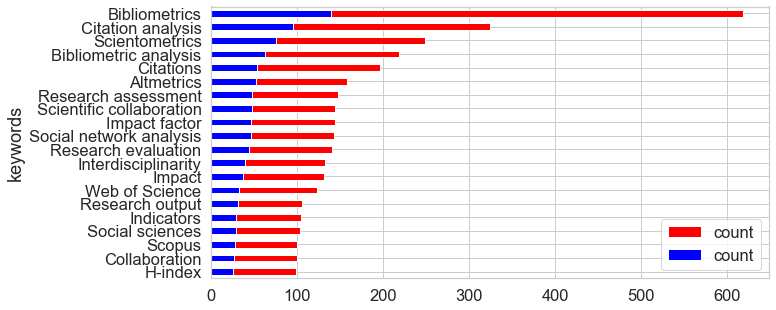

In [34]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
def make_figure(df_count1, df_count2, time=None):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot horizontal bar graph
    df_count1[:20].sort_values(by='count').plot.barh(x='keywords',
                          y='count',
                          ax=ax,
                          color="red")
    
    df_count2[:20].sort_values(by='count').plot.barh(x='keywords',
                          y='count',
                          ax=ax,
                          color="blue")

    # ax.set_title("keyword freq. top 100 {}".format(time))

# for i, time in enumerate(times):
#     make_figure(df_counts[time], time)


df_count1 = df_counts[times[0]]
df_count2 = df_counts[times[1]]

make_figure(df_count1, df_count2)

plt.show()




In [32]:
df_count1[:20]

,keywords,count
0,Bibliometrics,618
1,Citation analysis,324
2,Scientometrics,249
3,Citations,218
4,Bibliometric analysis,196
5,China,158
6,Co-authorship,148
7,Impact factor,144
8,h-index,144
9,Social network analysis,143


In [33]:
df_count2[:20]

,keywords,count
0,Bibliometrics,139
1,Citation analysis,95
2,Scientometrics,76
3,Bibliometric analysis,63
4,Citations,53
5,Altmetrics,52
6,Research assessment,48
7,Scientific collaboration,48
8,Impact factor,46
9,Social network analysis,46
